# Data Science Challenge

In [0]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [0]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every job posting.
`title` | The title of the job offered. For example, Marketing Intern, Developer, etc.
`location` | The geographical location of the job.
`department` | The department of the job. For example, Sales, etc.
`industry` | The industry of the job. For example, IT, Health, etc.
`salary_range` | The salary range offered by the company (in \$\$).
`work_from_home` | The flag indicates if the job allows work from home..
`company_logo` | The flag indicates if the company offering the job has a registered logo.
`screening_round` | The flag indicates if there will be a screening round for candidates applying for the job.
`employment_type` | The type of employment offered by the company. For example, Full-time, Part-time, etc.
`required_experience` | The minimum experience required for the job. (in years).
`required_education` | The minimum required education for the job. For example, Master's Degree, Bachelor's Degree, etc.
`is_authentic` | The flag indicates if the job posting is authentic or not. Values are 1 (authentic) and 0 (not authentic).

## Data Wrangling & Visualization

In [0]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [0]:
data.head()

,id,title,location,department,industry,salary_range,work_from_home,company_logo,screening_round,employment_type,required_experience,required_education,is_authentic
0,17693,Administrative Assistant,Sacramento,Information Technology,Education Management,34000-42000,0,0,0,Full-time,Entry level,NaN,0
1,14476,Junior Lifestyle Consultant,Athens,Administrative,Telecommunications,NaN,0,1,1,Full-time,Not Applicable,Bachelor's Degree,1
2,14799,Licensed Clinician,Athens,Other,Financial Services,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,1
3,10409,English Teacher Abroad,Sacramento,Engineering,Education Management,NaN,0,1,1,Contract,NaN,Bachelor's Degree,1
4,13359,Senior Sales Executive - West,San Francisco,Administrative,Consumer Services,NaN,1,1,1,Full-time,Executive,Bachelor's Degree,1


In [0]:
#Explore columns
data.columns

Index(['id', 'title', 'location', 'department', 'industry', 'salary_range',
       'work_from_home', 'company_logo', 'screening_round', 'employment_type',
       'required_experience', 'required_education', 'is_authentic'],
      dtype='object')

In [0]:
#Description
data.describe()

,id,work_from_home,company_logo,screening_round,is_authentic
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,9449.487512,0.050450,0.667832,0.434066,0.692807
std,5469.589566,0.218925,0.471109,0.495757,0.461445
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,4897.500000,0.000000,0.000000,0.000000,0.000000
50%,8933.000000,0.000000,1.000000,0.000000,1.000000
75%,14299.500000,0.000000,1.000000,1.000000,1.000000
max,17873.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
data['title'].unique(), data['title'].unique().shape

(array(['Administrative Assistant', 'Junior Lifestyle Consultant',
        'Licensed Clinician', ..., 'Security Field Tech',
        'Lead UI / UX Designer',
        'Human Resources Assistant/Executive Assistant/Legal Assistant /Logistics Assistant/Data Entry Clerk /Customer Service Rep/Security Assistant..'],
       dtype=object), (1560,))

In [0]:
data['location'].unique(), data['location'].unique().shape

(array(['Sacramento', 'Athens', 'San Francisco', 'New York', 'London'],
       dtype=object), (5,))

In [0]:
data['department'].unique(), data['department'].unique().shape

(array(['Information Technology', 'Administrative', 'Other', 'Engineering',
        'Education', 'Design', 'Customer Service', 'Marketing',
        'Health Care Provider', 'Sales'], dtype=object), (10,))

In [0]:
data['industry'].unique(), data['industry'].unique().shape

(array(['Education Management', 'Telecommunications', 'Financial Services',
        'Consumer Services', 'Hospital & Health Care',
        'Marketing and Advertising', 'Information Technology and Services',
        'Internet', 'Oil & Energy', 'Computer Software'], dtype=object), (10,))

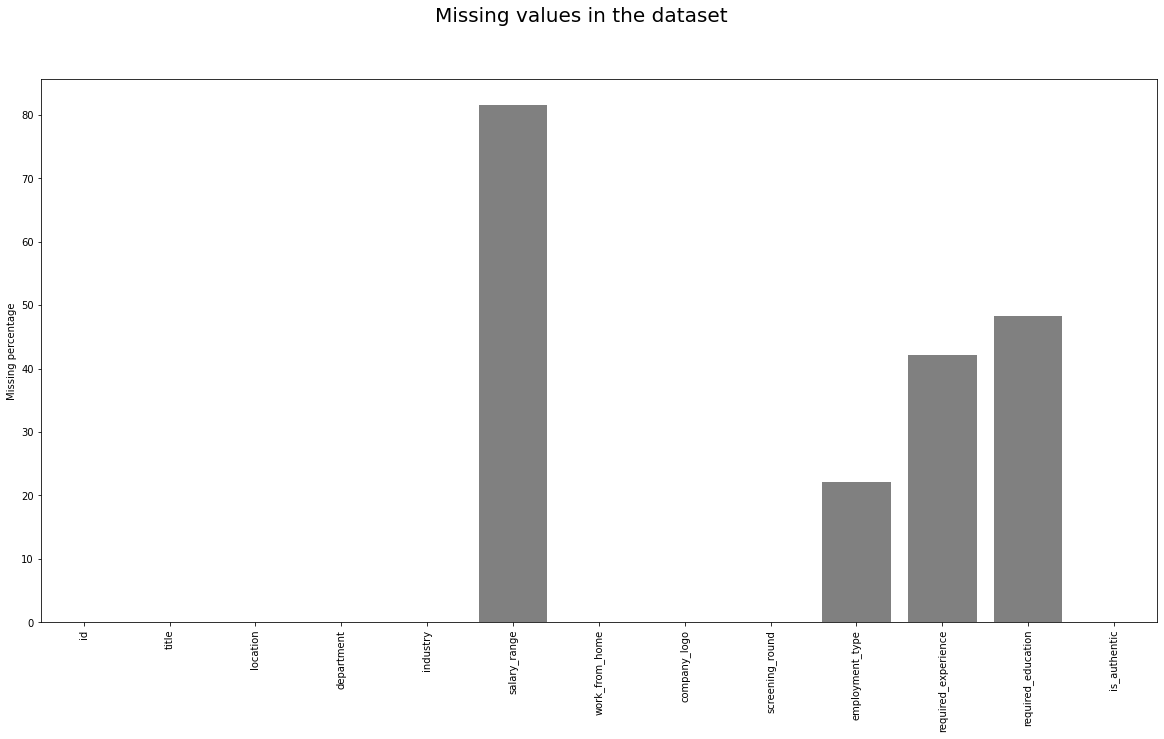

In [0]:
null_values = data.isnull().mean()*100
plt.figure(figsize = (20,10))
sns.barplot(null_values.index, null_values, color = 'grey')
plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing percentage')
plt.xticks(rotation = '90')
plt.show()

In [0]:
"""
Dropping Salary with 80% missing values

"""
data.drop(['salary_range'], axis=1, inplace=True)

In [0]:
"""
Imputing the missing values for employment_type (20-30% missing)

"""
data['employment_type'] = data.groupby(['industry'])['employment_type'].transform(lambda x: x.fillna(x.mode()[0]))


In [0]:
"""
Replacing nan values by 'Not Provided' that would be later used for one hot encoding.
(not imputing because nearly 40% are missing)

"""

replace_map = {
    'required_experience':{
        np.nan: 'Not Provided'
         
    },
    'required_education':{
        np.nan: 'Not Provided'
   
        
    }
}

data = data.replace(replace_map)

## Visualization, Modeling, Machine Learning

Build a model that can predicts the authenticity of a job posting and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [0]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,title,location,department,industry,salary_range,work_from_home,company_logo,screening_round,employment_type,required_experience,required_education
0,3911,linux Engineer,Sacramento,Health Care Provider,Oil & Energy,NaN,0,1,0,Contract,NaN,NaN
1,2808,Art Director (Freelance to Full-time),Sacramento,Engineering,Marketing and Advertising,NaN,0,1,1,Full-time,Associate,Bachelor's Degree
2,17644,Daily Money Team Representative,London,Customer Service,Internet,NaN,1,1,1,Part-time,NaN,High School or equivalent
3,11629,Sales Professional- SMB (Full-Time),New York,Marketing,Computer Software,21600-31200,0,1,0,Full-time,Entry level,High School or equivalent
4,7269,Mobile Developer,Sacramento,Design,Financial Services,NaN,0,1,0,NaN,NaN,NaN


In [0]:
test_id = test_data['id']

test_data['employment_type'] = test_data['employment_type'].fillna(data['employment_type'].mode()[0])
test_data = test_data.replace(replace_map)
test_data.drop(['salary_range'], axis=1, inplace=True)

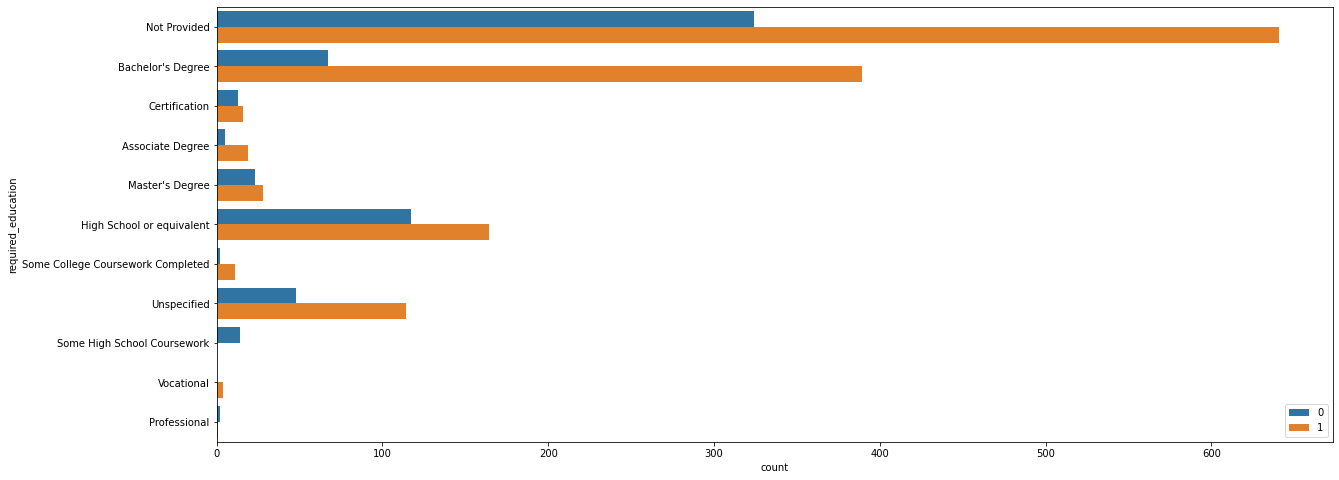

In [0]:
"""
Exploring the distribution of required_education wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='required_education',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1. Most job posting that require for 'Some High School Coursework' are fradulent.
2. Difference between nuber of authentic and fraudulent jobs is subtle for Master's degree and 'Certification'
3. More number of jobs requiring bachelor's degree (and where job requirement is not provided) are authentic than fradulent. 
4. Most job posting that require for 'Vocational' are authentic.

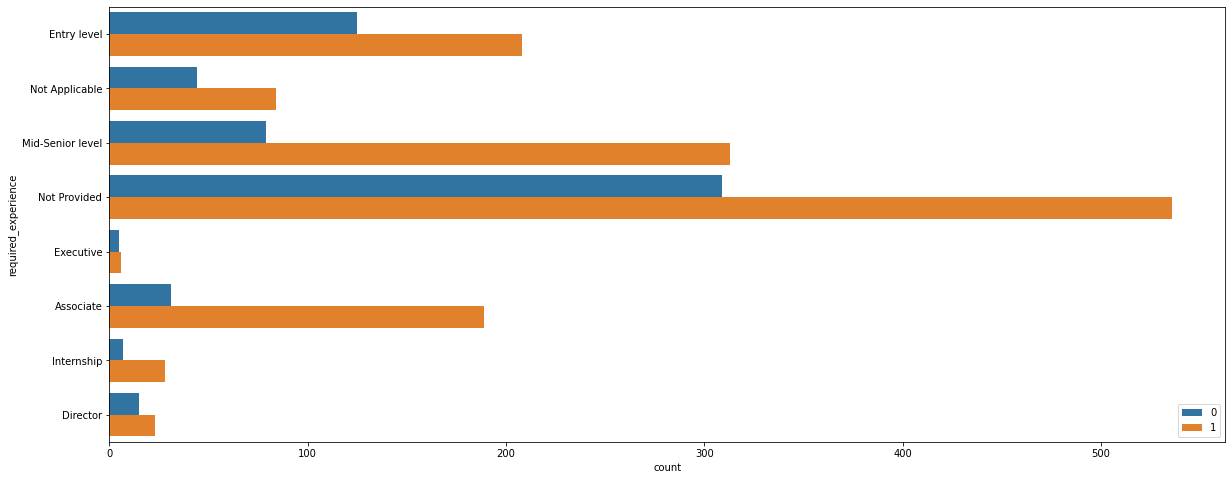

In [0]:
"""
Exploring the distribution of required_experience wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='required_experience',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1. Number of jobs posting for Executive and Director are approximately distributed between authentic and fradulent. 
2. Almost all levels except Executive and Director has large number of authentic job postings as compared to fradulents. 

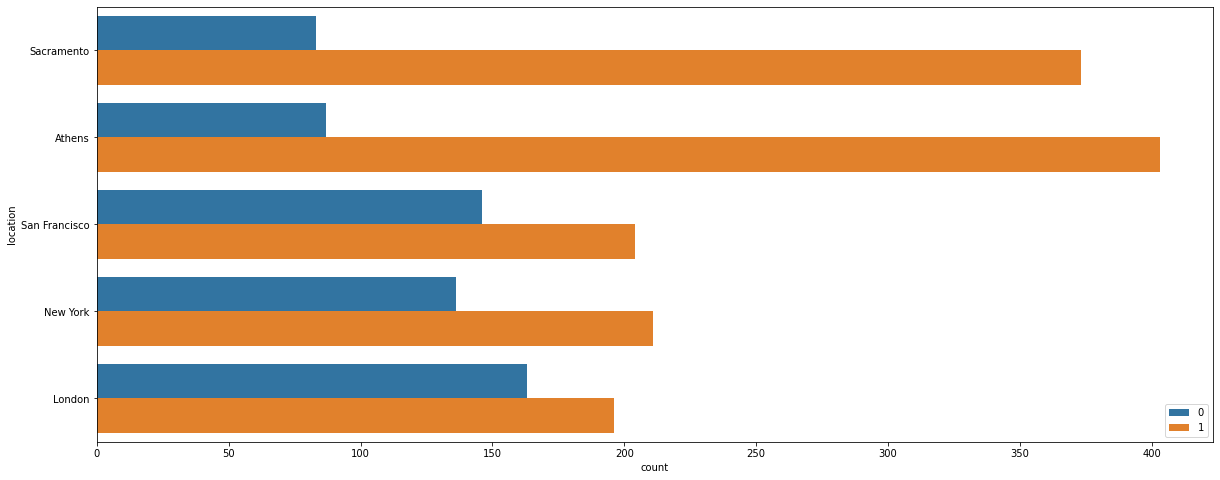

In [0]:
"""
Exploring the distribution of location wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='location',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1. Every city has lesser number of fraduant jobs than authentic ones.
2. Least numbers of fradulent jobs are observed in Sacramento. 
2. Highest number of authentic jobs are observed in Athens.

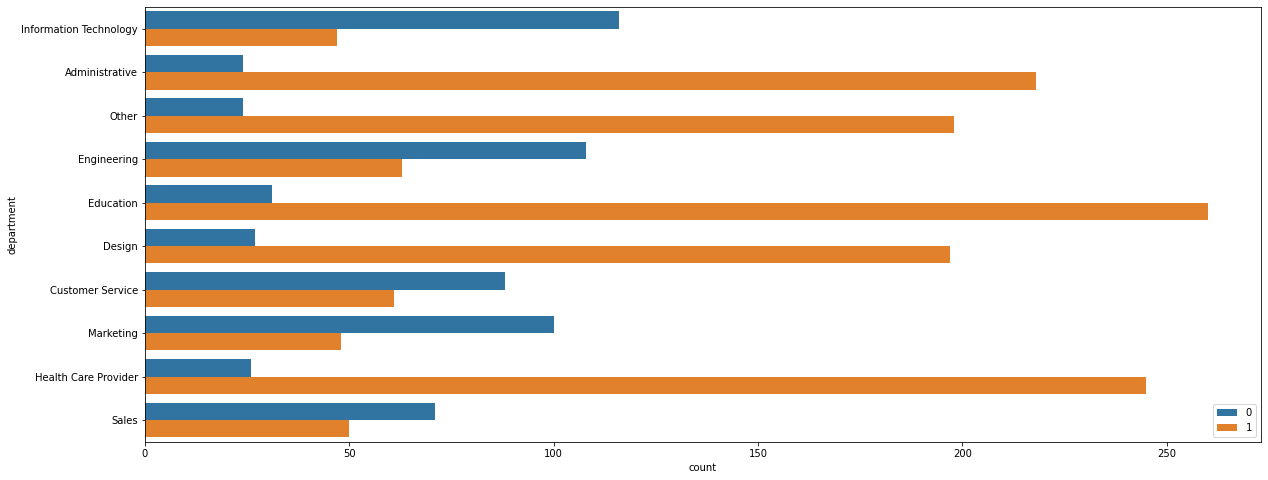

In [0]:
"""
Exploring the distribution of department wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='department',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1. Higher number of fradulent jobs (than authentic jobs) are observed in Information Technology, Engineering, Customer Service, Marketing and Sales.

2. Health Care Provider, Administrative, Design and Education has lessen number of fraudulent jobs than authentic. 

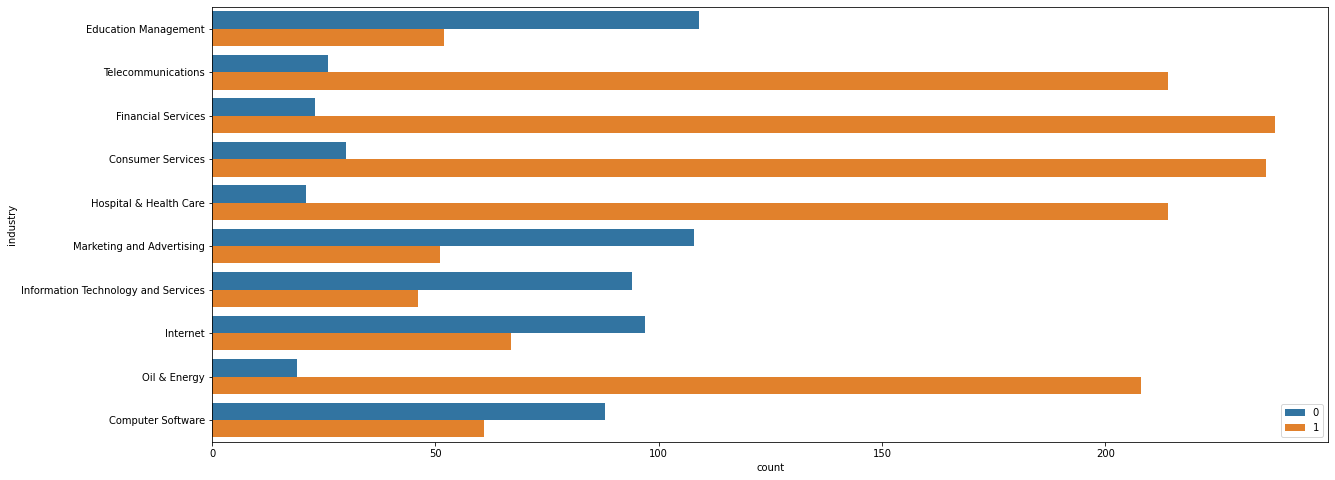

In [0]:
"""
Exploring the distribution of industry wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='industry',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1.  Financial services, Hospital & Health Car, Telecommunication, Consumer Services and Oil & Energy has far more number of authentic jobs than fradulent.

2. Education Management, Marketing and Advertising, Computer Software, Internet and Information Technology Services has more number fradulent jobs then authentic. 

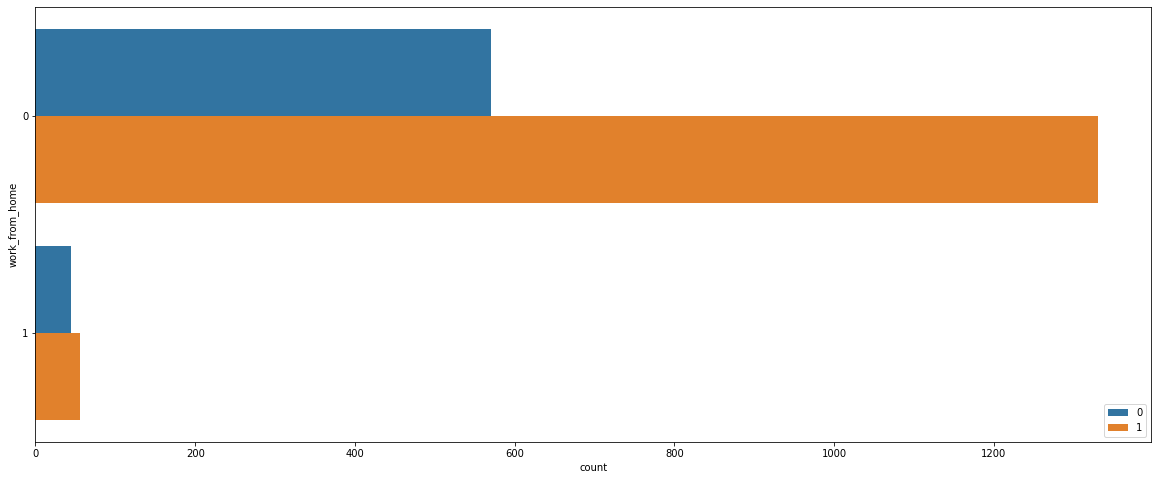

In [0]:
"""
Exploring the distribution of work_from_home wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='work_from_home',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1. Difference between authentic and fradulent is subtle between companies that provide work from home option.
2. Most companies that does not provide work from home are authentic.

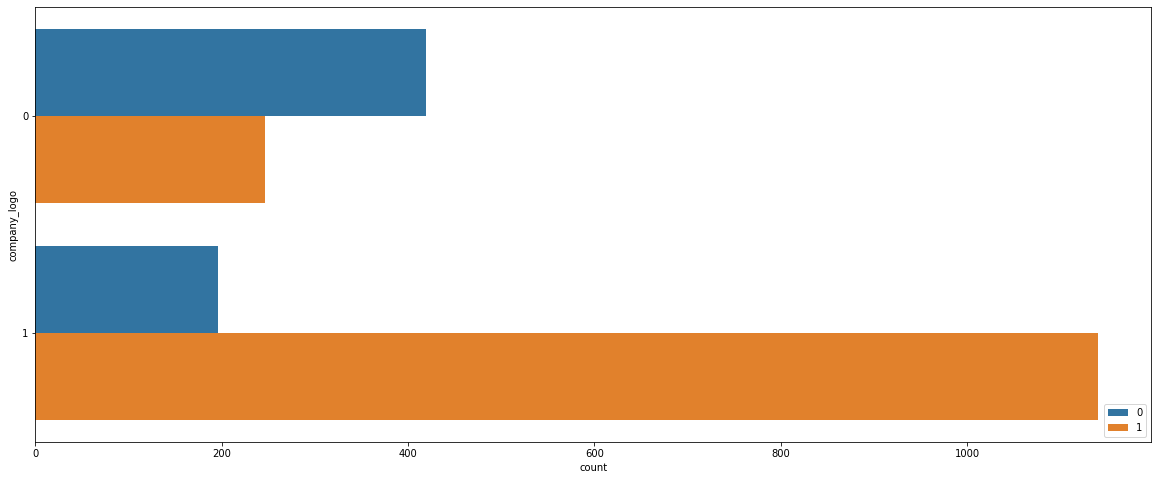

In [0]:
"""
Exploring the distribution of company_logo wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='company_logo',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1. Most jobs with company logo are authentic.
2. Job posting with no company logos have more fradulent jobs.

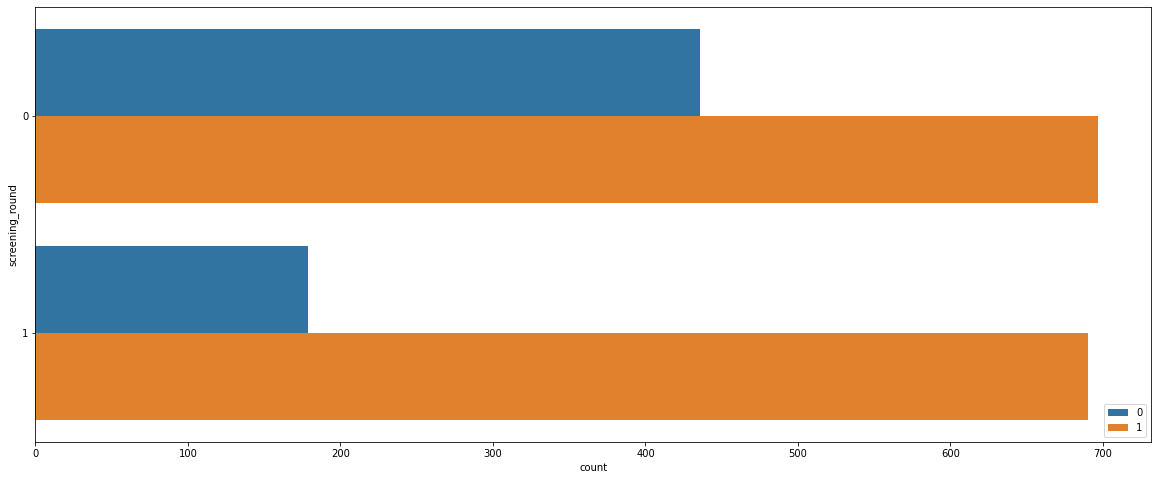

In [0]:
"""
Exploring the distribution of screening_round wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='screening_round',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1. Companies with or without screening round are equally likely to be authentic. 

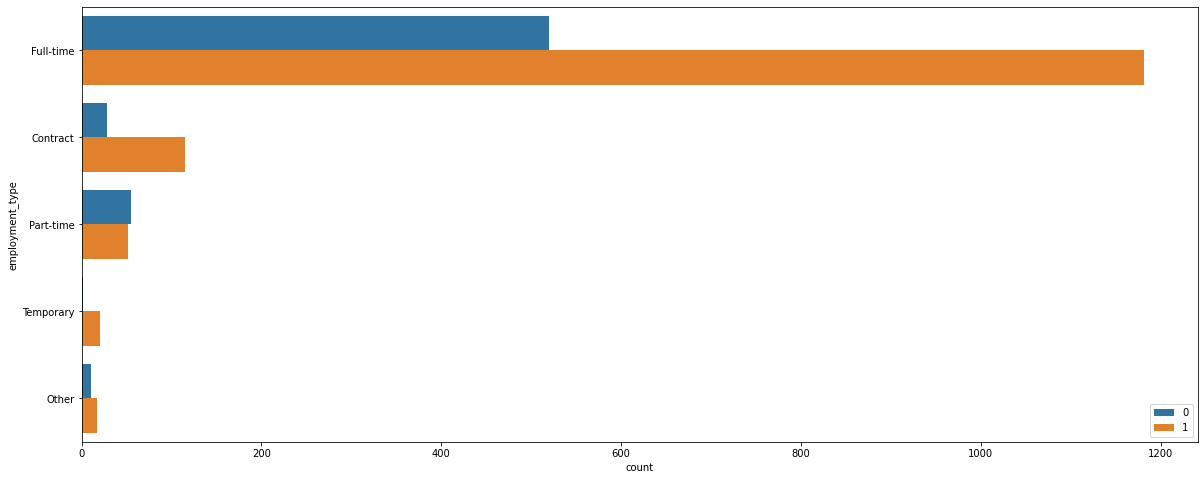

In [0]:
"""
Exploring the distribution of employment_type wrt target class
"""

plt.figure(figsize=(20,8))
sns.countplot(hue='is_authentic',y='employment_type',data=data)
plt.legend(loc='lower right')
plt.show()

Inferences

1. Part-time jobs are equally likely to be authentic and fradulent.
2. All other job posting with employment types (except Partime) are more likely to be authentic than fradulent. 

In [0]:
def preprocess(temp_list):
    temp_list = list(filter(lambda x: True if x not in ['-', '', '/'] else False, temp_list))
    return temp_list

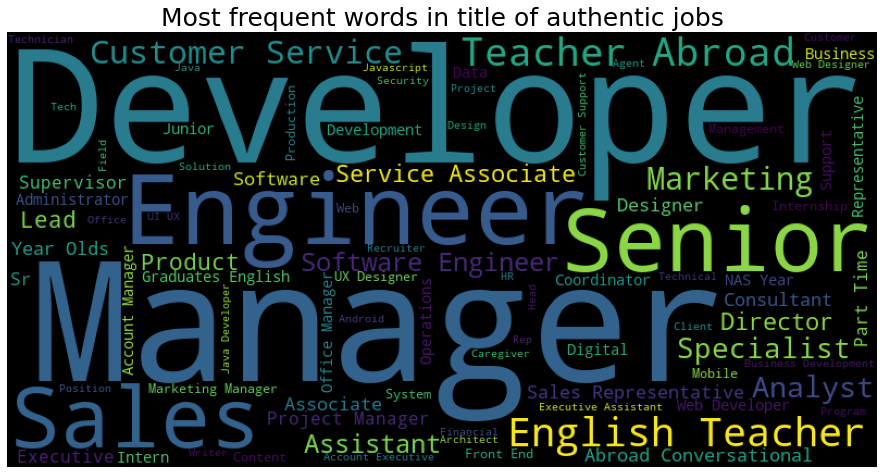

In [0]:
"""
Exploring words in the title of authentic jobs. 
"""

authentic_text_str = ' '.join(data[data['is_authentic']==1]['title'])   
wordcloud = WordCloud(width=800,height=400,stopwords=STOPWORDS, min_font_size=10,max_words=150).generate(authentic_text_str)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most frequent words in title of authentic jobs", fontsize=25)
plt.show()

In [0]:
authentic_text_list = preprocess(authentic_text_str.lower().split(" "))
top_10_authentic_title = sorted(Counter(authentic_text_list).items(), key=lambda x: x[1], reverse=True)[0:10]
top_10_authentic_title = [i[0] for i in top_10_authentic_title]
top_10_authentic_title

['manager',
 'developer',
 'engineer',
 'sales',
 'customer',
 'senior',
 'service',
 'marketing',
 'teacher',
 'english']

Inference

1. Top 10 frequently used words in the title of job postings of the authentic jobs are 'manager','developer', 'engineer','sales','customer','senior','service','marketing','teacher','english'

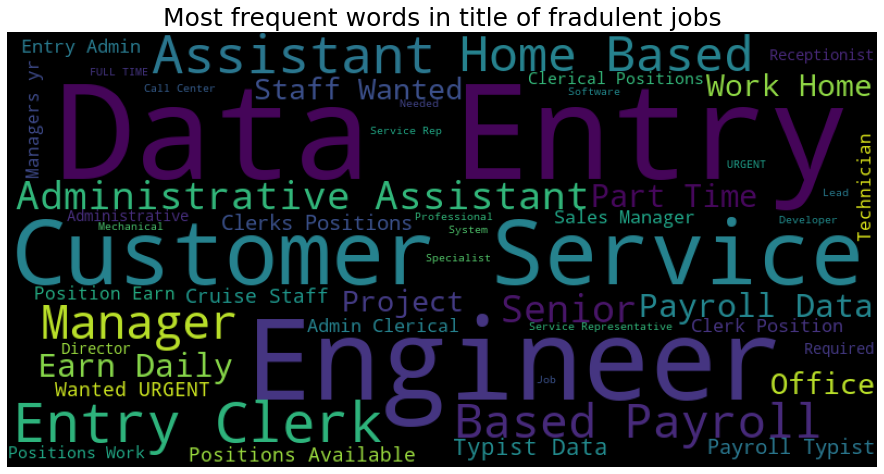

In [0]:
"""
Exploring words in the title of fradulent jobs. 
"""

fradulent_text_str = ' '.join(data[data['is_authentic']==0]['title'])                                                                    
wordcloud = WordCloud(width=800,height=400,stopwords=STOPWORDS, min_font_size=10,max_words=150).generate(fradulent_text_str)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most frequent words in title of fradulent jobs", fontsize=25)
plt.show()

In [0]:
fradulent_text_list = preprocess(fradulent_text_str.lower().split(" "))
top_10_fradulent_title = sorted(Counter(fradulent_text_list).items(), key=lambda x: x[1], reverse=True)[0:10]
top_10_fradulent_title = [i[0] for i in top_10_fradulent_title]
top_10_fradulent_title

['entry',
 'data',
 'engineer',
 'assistant',
 'home',
 'payroll',
 'clerk',
 'customer',
 'positions',
 'service']

Inference

1. Top 10 frequently used words in the title of the job postings of the fradulent jobs are 'entry', 'data', 'engineer','assistant', 'home','payroll','clerk','customer','positions','service'.

In [0]:
"""Feature Engineering using Fradulent and Authentic Words in the Title"""

top_10_authentic_title_set, top_10_fradulent_title_set = set(top_10_authentic_title), set(top_10_fradulent_title)
f1 = lambda x: 1 if set(x.lower().split(' ')).intersection(top_10_authentic_title_set) else 0
data['is_title_very_authentic'] = data['title'].apply(f1)
test_data['is_title_very_authentic'] = test_data['title'].apply(f1)

f2 = lambda x: 1 if set(x.lower().split(' ')).intersection(top_10_fradulent_title_set) else 0
data['is_title_very_fradulent'] = data['title'].apply(f2)
test_data['is_title_very_fradulent'] = test_data['title'].apply(f2)

In [0]:
data.drop(['id', 'title'], axis =1, inplace =True)
test_data.drop(['id', 'title'], axis =1, inplace =True)

"""
One hot encoding
"""

one_hot = ['location', 'department', 'industry', 'employment_type','required_experience', 'required_education']
data = pd.get_dummies(data, columns=one_hot)
test_data = pd.get_dummies(test_data, columns=one_hot)

X_train,X_valid,Y_train,Y_valid=train_test_split(
    data.drop(['is_authentic'], axis = 1),
    data[['is_authentic']],
    train_size=0.8)

In [0]:
'''
Model-I: Logistic Regression for binary classification
'''
model = LogisticRegression()
clf = model.fit(X_train, Y_train)
Y_pred = clf.predict(X_valid)
accuracy_score(Y_valid,Y_pred)

/home/harshit/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.912718204488778

In [0]:
'''
Model-II: Using Xgboost for classification.
'''
model = XGBClassifier()
model.fit(X_train, Y_train) 

Y_pred=model.predict(X_valid)
accuracy_score(Y_valid,Y_pred)

/home/harshit/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harshit/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8902743142144638

In [0]:
'''
Hyperparameter tuning using Xgboost
'''
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.2,0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 3, 5]
        }

xgb = XGBClassifier(n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

random_search = RandomizedSearchCV(xgb, 
                                   param_distributions=params,
                                   n_iter=5, 
                                   scoring='accuracy', 
                                   n_jobs=4,
                                cv=5)
random_search.fit(X_train, Y_train)

/home/harshit/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harshit/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           subsample=None, tree_method=None,
                                           validate_parameters=False,
                                 

In [0]:
'''
Selecting the best model and calculating the accuracy of the classifier.
'''
best_model=random_search.best_estimator_
Y_pred=best_model.predict(X_valid)
accuracy_score(Y_valid,Y_pred)

0.9052369077306733



**The management wants to know what are the most important features for your model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


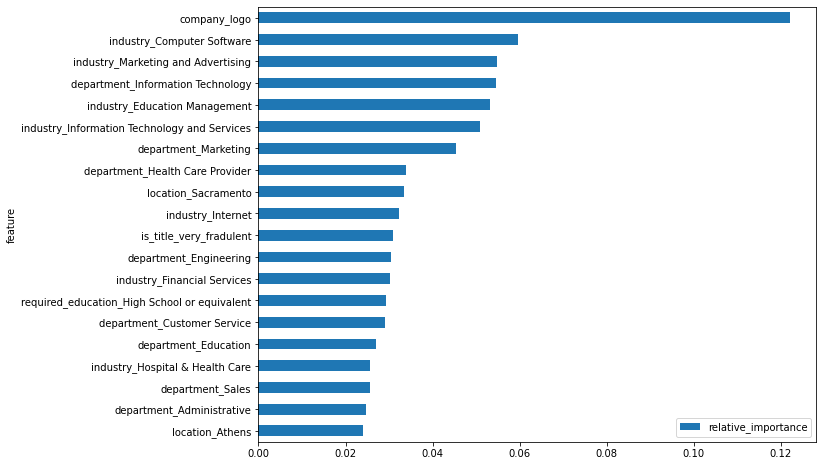

In [0]:
feature_imp=pd.DataFrame()
for feature,imp in zip(X_train.columns,best_model.feature_importances_):
    temp=pd.DataFrame([feature,imp]).T
    feature_imp=feature_imp.append(temp)
feature_imp.columns=['feature','relative_importance']
feature_imp.sort_values(by='relative_importance',inplace=True)
feature_imp.set_index('feature',inplace=True)
feature_imp.iloc[-20:,:].plot(kind='barh',figsize=(10,8))
plt.show()

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `is_authentic` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **is_authentic**

In [0]:
submission=best_model.predict(test_data)

In [0]:
submission_df=pd.DataFrame(
{
    'id':test_id,
    'is_authentic':submission
})

In [0]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---